In [1]:
import cv2
from tqdm import tqdm_notebook

# Opens the Video file
cap= cv2.VideoCapture('data/001/vid.avi')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('hey/'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [17]:
def swap_columns(my_array, col1, col2):
    temp = my_array[:,col1].copy()
    my_array[:,col1] = my_array[:,col2]
    my_array[:,col2] = temp

In [18]:
a = np.array([[1,2,3],
             [4,5,6]])
swap_columns(a,1,2)
a

array([[1, 3, 2],
       [4, 6, 5]])

# Visualization

In [2]:
import numpy as np
import cv2
from helper.preprocessing import pts_loader

vid_idx = 1

cap = cv2.VideoCapture('data/'+str(vid_idx).zfill(3)+'/vid.avi')

i=1
while(1):
    ret, frame = cap.read()
    annots = np.array(pts_loader.load("data/"+str(vid_idx).zfill(3)+"/annot/"+str(i).zfill(6)+".pts"))

    annots = np.round(annots,0).astype('uint16')

    for annot in annots:
        annot = tuple(annot)
        frame = cv2.circle(frame,annot,1,255,-1) 
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    i+=1

cap.release()
cv2.destroyAllWindows()

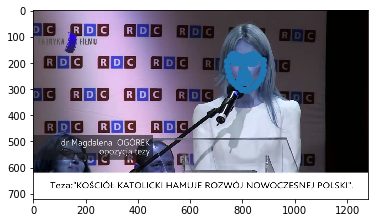

In [23]:
import matplotlib.pyplot as plt

vid_idx=1
cap = cv2.VideoCapture('data/'+str(vid_idx).zfill(3)+'/vid.avi')
ret, frame = cap.read()
plt.imshow(frame)
plt.scatter(data[:,0],data[:,1])

In [25]:
frame_ =  cv2.resize(frame,(320,180),interpolation = cv2.INTER_AREA)
data_ = data.copy()
data_[:,0] /= 4
data_[:,1] /= 4

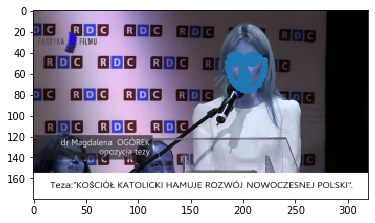

In [26]:
plt.imshow(frame_)
plt.scatter(data_[:,0],data_[:,1])

# Preprocess data

In [8]:
import numpy as np
import cv2
from helper.preprocessing import pts_loader
import os 
from tqdm import tqdm_notebook

DATA_FOLDER = "data/"
SAMPLE_EVERY = 15
RESIZE_SHAPE = (224,224)

for idx_folder in tqdm_notebook(os.listdir(DATA_FOLDER)):
    cap = cv2.VideoCapture(DATA_FOLDER + idx_folder +'/vid.avi')
    ret, frame = cap.read()
    i=1
    
    while(cap.isOpened()):
        
        ret, frame = cap.read()

        if i%SAMPLE_EVERY==0:    
    
            try:
                # Get image size
                HEIGHT, WIDTH = frame.shape[:2]
            except:
                break

            
            # Resize image
            frame = cv2.resize(frame,RESIZE_SHAPE,interpolation = cv2.INTER_AREA)
            
            RESIZE_PERCENT_x = RESIZE_SHAPE[0]/WIDTH
            RESIZE_PERCENT_y = RESIZE_SHAPE[1]/HEIGHT
            
            # Load the annotation for that data
            annots = np.array(pts_loader.load(DATA_FOLDER+idx_folder+"/annot/"+str(i).zfill(6)+".pts"))

            
            # Resize annot
            annots[:,0] *= RESIZE_PERCENT_x
            annots[:,1] *= RESIZE_PERCENT_y
            
            cv2.imwrite("processed_data_2/images/"+idx_folder+"_frame_"+str(i)+".png",frame)
            np.save("processed_data_2/targets/"+idx_folder+"_frame_"+str(i)+".npy",annots)

            
        i+=1

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("processed_data/images/053_frame_1140.png")
image_ = image.copy()
target = np.load("processed_data/targets/053_frame_1140.npy")
for annot in target:
    annot = tuple(annot.astype('uint16'))
    image_ = cv2.circle(image_,annot,1,255,-1) 

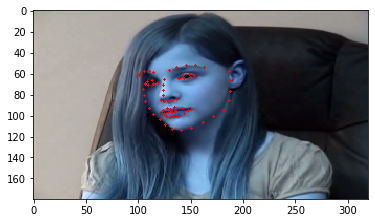

In [57]:
import matplotlib.pyplot as plt
plt.imshow(image_)

In [58]:
cv2.imwrite("samples/3.jpg",image_)

True

In [11]:
WIDTH = 224
HEIGHT = 224
NUM_AXIS = 2
NUM_ANNOT = 68

images = []
targets = []

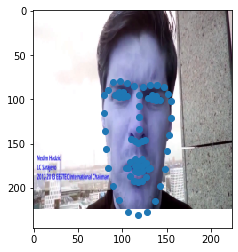

In [12]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.scatter(target[:,0],target[:,1])

# Load and save image arrays

In [1]:
import os
import numpy as np
from tqdm import tqdm_notebook
import cv2

WIDTH = 320
HEIGHT = 180
NUM_AXIS = 2
NUM_ANNOT = 68

images = [] 
targets = []

DATA_PATH = "processed_data_2/"
IMAGES_PATH = DATA_PATH + "images/"
TARGETS_PATH = DATA_PATH + "targets/"

for FILE_NAME in tqdm_notebook(os.listdir(IMAGES_PATH)):
    image = cv2.imread(IMAGES_PATH + FILE_NAME)
    images.append(image)

images = np.array(images)
np.save(DATA_PATH+"images_tensor.npy",images)




In [ ]:
for FILE_NAME in tqdm_notebook(os.listdir(TARGETS_PATH)):
    target = np.load(TARGETS_PATH + FILE_NAME)
    targets.append(target)
targets = np.array(targets)
np.save(DATA_PATH+"targets_mat.npy",targets)